In [ ]:
import numpy as np

## 변수명 정하는 규칙
- 아래 줄에서는 X를 대문자로 적었는데 대문자로 적는 이유는 다차원이기 때문에
- 대문자이긴 하지만 1차원인데, 이유는 단순한 예제이기 때문에

##### 아래 X는 독립변수

In [19]:
X = np.array([1, 2, 3], dtype="float32")
X

array([1., 2., 3.], dtype=float32)

##### 아래 y는 종속변수

In [20]:
y = np.array([2, 2.5, 3.5], dtype="float32")
y

array([2. , 2.5, 3.5], dtype=float32)

#####  아래  w와 b는 초기화 가중치와 bias

In [21]:
w = 2
b = 1

##### 아래 hypothesis는 예측값

In [6]:
hypothesis = X * w + b
hypothesis

array([3., 5., 7.], dtype=float32)

In [7]:
hypothesis-y

array([1. , 2.5, 3.5], dtype=float32)

원래 안되야 하는데 numpy에서 알아서 바꿔주는 듯

In [11]:
w_grad = 1/3 * np.dot((hypothesis - y), X)
w_grad

5.5

In [14]:
b_grad = np.sum(hypothesis - y)/3
b_grad

2.3333333333333335

In [15]:
w = w-w_grad
w

-3.5

In [16]:
b = b-b_grad
b

-1.3333333333333335

##### 어느순간 overshooting이 나버린다
#### 이유는 grad 량이 너무 커져서 그렇기 때문

In [17]:
for i in range(100):
    hypothesis = X * w + b
    print(f'{i+1}번째 hypothesis = {hypothesis}')
    cost = np.sum((hypothesis - y)**2)
    print(f'{i+1}번째 cost = {cost}')
    w_grad = 1/len(X)*np.dot((hypothesis - y), X.T)
    print(f'{i+1}번째 w_grad = {w_grad}')
    b_grad = 1/len(X) * np.sum(hypothesis - y)/3
    w -= w_grad
    b -= b_grad
    print(f'{i+1}번째 w = {w}, b = {b}')
    

1번째 hypothesis = [ -4.8333335  -8.333333  -11.833333 ]
1번째 cost = 399.1666564941406
1번째 w_grad = -24.833333333333332
1번째 w = 21.333333333333332, b = 2.333333333333333
2번째 hypothesis = [23.666668 45.       66.333336]
2번째 cost = 6223.72265625
2번째 w_grad = 98.38888549804688
2번째 w = -77.05555216471355, b = -11.777778625488281
3번째 hypothesis = [ -88.83333 -165.88889 -242.94443]
3번째 cost = 97340.359375
3번째 w_grad = -388.9814453125
3번째 w = 311.92589314778644, b = 44.40740542941623
4번째 hypothesis = [356.3333 668.2592 980.1851]
4번째 cost = 1522701.25
4번째 w_grad = 1538.6357421875
4번째 w = -1226.7098490397136, b = -177.45677100287543
5번째 hypothesis = [-1404.1666 -2630.8765 -3857.5862]
5번째 cost = 23819964.0
5번째 w_grad = -6085.392578125
5번째 w = 4858.682729085286, b = 700.3908852471245
6번째 hypothesis = [ 5559.073 10417.756 15276.438]
6번째 cost = 372621280.0
6번째 w_grad = 24068.799479166664
6번째 w = -19210.11675008138, b = -2771.3055123223194
7번째 hypothesis = [-21981.422 -41191.54  -60401.656]
7번째 cost = 

c:\library\python\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
c:\library\python\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\library\python\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
c:\library\python\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Overshooting을 막기 위해 learning rate를 설정

In [23]:
learning_rate = 0.1
hypothesis_list = []
cost_list = []

for i in range(100):
    hypothesis = X * w + b
    print(f'{i+1}번째 hypothesis = {hypothesis}')
    cost = np.sum((hypothesis - y)**2)
    print(f'{i+1}번째 cost = {cost}')
    w_grad = 1/len(X)*np.dot((hypothesis - y), X.T)
    print(f'{i+1}번째 w_grad = {w_grad}')
    b_grad = 1/len(X) * np.sum(hypothesis - y)/3
    w -= learning_rate * w_grad
    b -= learning_rate * b_grad
    hypothesis_list.append(hypothesis)
    cost_list.append(cost)
    print(f'{i+1}번째 w = {w}, b = {b}')
    

1번째 hypothesis = [1.7984762 2.6386352 3.4787943]
1번째 cost = 0.06028122082352638
1번째 w_grad = 0.004043181737263997
1번째 w = 0.8397547682126371, b = 0.9592514634132386
2번째 hypothesis = [1.7990062 2.638761  3.4785156]
2번째 cost = 0.06011470407247543
2번째 w_grad = 0.004025061925252278
2번째 w = 0.8393522620201118, b = 0.9601816534996034
3번째 hypothesis = [1.7995338 2.6388862 3.4782386]
3번째 cost = 0.05994962155818939
3번째 w_grad = 0.0040073394775390625
3번째 w = 0.838951528072358, b = 0.9611076686117386
4번째 hypothesis = [1.8000592 2.6390107 3.4779623]
4번째 cost = 0.05978595092892647
4번째 w_grad = 0.003989100456237793
4번째 w = 0.8385526180267342, b = 0.9620295339160497
5번째 hypothesis = [1.8005822 2.6391346 3.4776874]
5번째 cost = 0.05962377414107323
5번째 w_grad = 0.003971179326375325
5번째 w = 0.8381555000940967, b = 0.9629472653071087
6번째 hypothesis = [1.8011028 2.6392584 3.4774137]
6번째 cost = 0.059463150799274445
6번째 w_grad = 0.003953496615091959
6번째 w = 0.8377601504325874, b = 0.9638608786794876
7번째 hypot

Cost 값 그려보기 및 예측된 Y값 비교

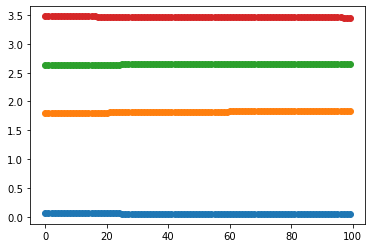

In [26]:
import matplotlib.pyplot as plt

plt.plot(cost_list, marker='o')
plt.plot(hypothesis_list, marker='o')